[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_13_Support_Vector_Machines.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_13_Support_Vector_Machines.ipynb)

# *Support Vector Machines* - SVM (Máquina de Vetores de Suporte)

**Objetivos**: Aprender o que é SVM usando a biblioteca `Scikit-Learn`. Introduzir a técnica e os diferentes tipos de *kernels*.

## O que é SVM?

SVM é uma técnica de aprendizado supervisionado que encontra um hiperplano de separação entre os dados. Esta separação busca minimizar uma função custo maximizando a distância entre os pontos, assim separando-os de maneira mais eficiente. O hiperplano de separação pode ser linear ou não dependendo do kernel.


<img src="images/support-vector-machines.png" alt="support-vector-machines" width="400"/>

## Classificação e Regressão

* Classificação: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Regressão: [`sklearn.svm.LinearSVR()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

## Hiperparâmetro $C$

Quanto **menor** $C$ mais **tolerante** (e ampla) serão as **margens dos hiperplanos** de separação e mais **flexível** o modelo.

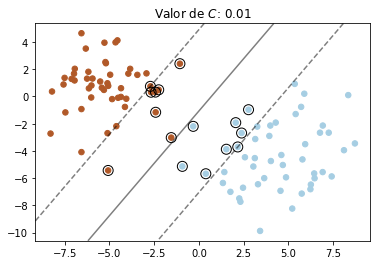

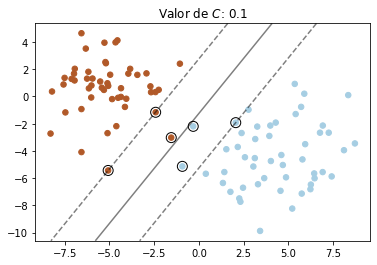

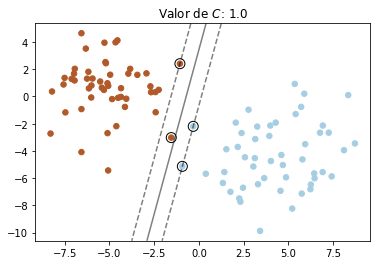

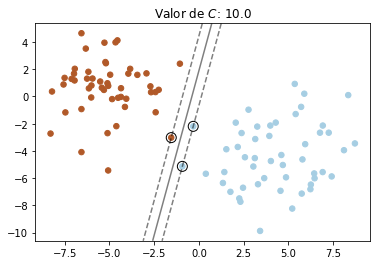

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs


# Criação de 100 pontos separáveis
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2, random_state=123)

# Implementando SVM linear para níveis diferentes de C
for C in [1e-2, 1e-1, 1e0, 1e1]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f"Valor de $C$: {C}")
plt.show()

## 3 tipos de Kernels

* Linear
* Radial
* Polynomial

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Somente pegar as duas primeiras features para plotar em 2-D
X = X[y != 0, :2]
y = y[y != 0]

In [3]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

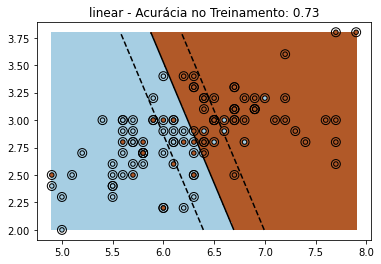

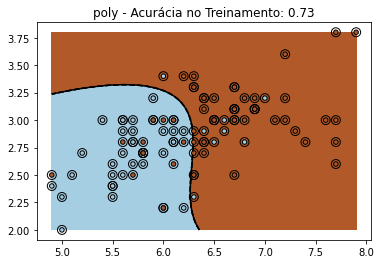

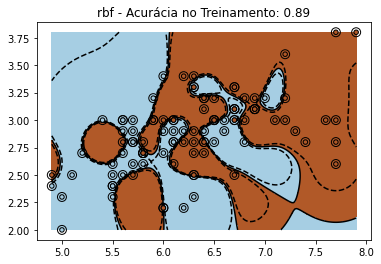

In [4]:
for kernel in ['linear', 'poly', 'rbf']:  # rbf - radial basis function
    clf = SVC(kernel=kernel, gamma=10, C=1e4)
    clf.fit(X, y)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Denotar com circulo o test set
    plt.scatter(X[:, 0], X[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Colocar o resultado num plot colorido
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    # Gerar previsoes no Train Set
    y_pred = clf.predict(X)
    acc = round(accuracy_score(y, y_pred), 3)

    plt.title(kernel + f" - Acurácia no Treinamento: {acc}")
plt.show()

## Pré-processamento dos Dados

SVM é extremamente sensível a dados não padronizados. Portanto é importante padronizar para que todas as variáveis preditoras tenham média $0$ e desvio padrão $1$.

Para isso, usamos a função [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [5]:
# Criação de 10.000 pontos separáveis
X, y = make_blobs(n_samples=10000, centers=2,
                  cluster_std=2, random_state=123)

In [6]:
%%time
clf = SVC(C=0.1, kernel='rbf', gamma=10)
clf.fit(X, y)

CPU times: user 3.18 s, sys: 84.9 ms, total: 3.27 s
Wall time: 3.34 s


SVC(C=0.1, gamma=10)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [8]:
%%time
clf = SVC(C=0.1, kernel='rbf', gamma=10)
clf.fit(X, y)

CPU times: user 681 ms, sys: 5.16 ms, total: 686 ms
Wall time: 689 ms


SVC(C=0.1, gamma=10)

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [10]:
# Normalizando as variáveis preditoras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM de Classificação
Usar a função do Scikit-Learn [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

#### Argumentos:
* `C` - `float` - Hyperparâmetro de Regularização (tem que ser positivo)
* `kernel` - `str` - Tipo do Kernel
    * `linear` - Kernel Linear
    * `poly` -  Kernel Polinomial
    * `rbf` -  Kernel Radial 
* `gamma` - Coeficiente de Kernel para `poly` e `rbf`
    * Padrão - `scale`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

### SVM de Regressão
Usar a função do Scikit-Learn [`sklearn.svm.LinearSVR()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

#### Argumentos:
* `C` - `float` - Hyperparâmetro de Regularização (tem que ser positivo)
* `kernel` - `str` - Tipo do Kernel
    * `linear` - Kernel Linear
    * `poly` -  Kernel Polinomial
    * `rbf` -  Kernel Radial 
* `gamma` - Coeficiente de Kernel para `poly` e `rbf`
    * Padrão - `scale`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [11]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

In [12]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.79

 ---------------------------

Acurácia de Teste: 0.75


## Testando vários *kernels*

In [13]:
from sklearn.svm import SVC
for kernel in ['linear', 'poly', 'rbf']:
    clf_kernel = SVC(kernel=kernel, random_state=123, C=10)
    clf_kernel.fit(X_train, y_train)
    print(f"Acurácia de teste - Kernel {kernel}: {round(clf_kernel.score(X_test, y_test), 3)}")

Acurácia de teste - Kernel linear: 0.754
Acurácia de teste - Kernel poly: 0.788
Acurácia de teste - Kernel rbf: 0.827


## Atividade - SVM com o dataset [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Setosa, Virginica e Versicolor). Quatro características foram medidas em cada amostra (cm):

* $N = 150$
* Atributos: 10
    * `sepal length (cm)` - Cumprimento da Sépala
    * `sepal width (cm)` - Largura da Sépala
    * `petal length (cm)` - Cumprimento da Pétala
    * `petal width (cm)` - Largua da Sépala
* Variável dependente: Tipo de espécie de Iris
    * `0` - Setosa
    * `1` - Virginica
    * `2` Versicolor 

* Achar a acurácia do modelo e os respectivos coeficientes dos atributos ($\theta_i$) e viés/constante ($\theta_0$)

>Obs: usar `test_size = 0.25` e `random_state = 123`

<img src="images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

In [15]:
print('Nomes dos Atributos: ', iris['feature_names'])
print('Tamanho de X: ', X.shape,)
print('Tamanho de y: ', y.shape,)

Nomes dos Atributos:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tamanho de X:  (150, 4)
Tamanho de y:  (150,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

# Normalizando as variáveis preditoras
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (112, 4)
Tamanho de X_test:  (38, 4)
Tamanho de y_train:  (112,)
Tamanho de y_test:  (38,)
